In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
# ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download -d sachchitkunichetty/rvf10k


Dataset URL: https://www.kaggle.com/datasets/sachchitkunichetty/rvf10k
License(s): CC-BY-NC-SA-4.0
100% 272M/273M [00:14<00:00, 24.3MB/s]
100% 273M/273M [00:14<00:00, 20.2MB/s]


In [ ]:
! unzip rvf10k.zip

In [5]:
# Directories for training, validation, and test datasets
base_path = '/content/rvf10k'


# # ImageDataGenerator without data augmentation
# train_datagen = ImageDataGenerator(rescale=1./255)


# train_generator = train_datagen.flow_from_directory(
#     os.path.join(base_path, 'train'),
#     target_size=(299, 299),
#     batch_size=32,
#     class_mode='binary'
# )
# ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,

)

# Data generator for training dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

Found 7000 images belonging to 2 classes.


In [6]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(base_path, 'valid'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [7]:
#import ResNet50
from tensorflow.keras.applications import ResNet50

def build_model():
    base_model = ResNet50(weights=None, include_top=False, input_shape=(128, 128, 3))

    # Freeze the base model
    base_model.trainable = False

    # Add custom layers on top of the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [8]:
# Build and train the model without augmented data
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25686913 (97.99 MB)
Trainable params: 2099201 (8.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [9]:
history = model.fit(
    train_generator,
    # epochs=20,
    epochs=10,
    validation_data=valid_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

# Save the model without augmented data
model.save('/content/drive/MyDrive/InceptionResNetV3/model/v1_lightweigh_model.h5')
model.save('/content/drive/MyDrive/InceptionResNetV3/model/v1_lightweigh_model.keras')



Epoch 1/10
218/218 [==============================] - 86s 341ms/step - loss: 0.6951 - accuracy: 0.4970 - val_loss: 0.6930 - val_accuracy: 0.5017
Epoch 2/10
218/218 [==============================] - 67s 305ms/step - loss: 0.6939 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.5007
Epoch 3/10
218/218 [==============================] - 67s 306ms/step - loss: 0.6933 - accuracy: 0.5093 - val_loss: 0.6958 - val_accuracy: 0.5010
Epoch 4/10
218/218 [==============================] - 68s 312ms/step - loss: 0.6938 - accuracy: 0.5009 - val_loss: 0.6930 - val_accuracy: 0.4993
Epoch 5/10
218/218 [==============================] - 68s 313ms/step - loss: 0.6938 - accuracy: 0.5014 - val_loss: 0.6924 - val_accuracy: 0.5040
Epoch 6/10
218/218 [==============================] - 68s 309ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6967 - val_accuracy: 0.5010
Epoch 7/10
218/218 [==============================] - 67s 307ms/step - loss: 0.6932 - accuracy: 0.5106 - val_loss: 0.6955 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model.save('/content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned.keras')


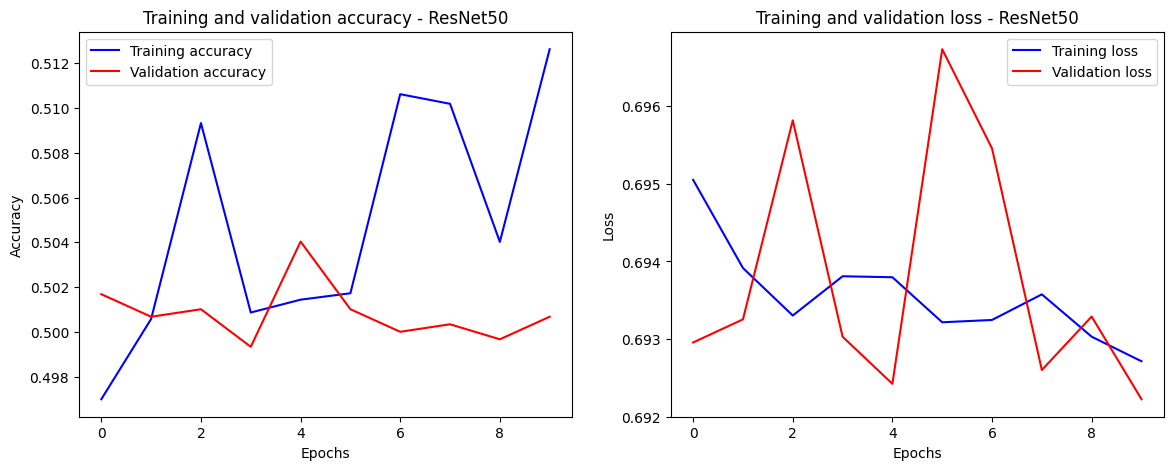

In [11]:
import matplotlib.pyplot as plt

# Function to plot training history


def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy - {title}')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss - {title}')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


# Build and train the model with augmented data
model_augmented = build_model()


# Plot the training history for the augmented model
plot_history(history, 'ResNet50')

In [12]:
! kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.75G/3.75G [02:51<00:00, 24.0MB/s]
100% 3.75G/3.75G [02:51<00:00, 23.5MB/s]


In [13]:
! unzip 140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [14]:
test_path = '/content/real_vs_fake/real-vs-fake'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(test_path, 'test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 20000 images belonging to 2 classes.


In [ ]:
# import model from /content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned_tenepoch.keras
model = tf.keras.models.load_model('/content/drive/MyDrive/InceptionResNetV3/model/v1_lightweigh_model.keras')

In [16]:
from sklearn import metrics

y_pred = model.predict(test_generator)
y_true = test_generator.classes

625/625 [==============================] - 136s 217ms/step


In [17]:
print("ROC AUC Score:", metrics.roc_auc_score(y_true, y_pred))
print("AP Score:", metrics.average_precision_score(y_true, y_pred))
print()
print(metrics.classification_report(y_true, y_pred > 0.5))

ROC AUC Score: 0.575943975
AP Score: 0.5575947112040491

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10000
           1       0.73      0.00      0.00     10000

    accuracy                           0.50     20000
   macro avg       0.62      0.50      0.34     20000
weighted avg       0.62      0.50      0.34     20000



<Figure size 800x600 with 0 Axes>

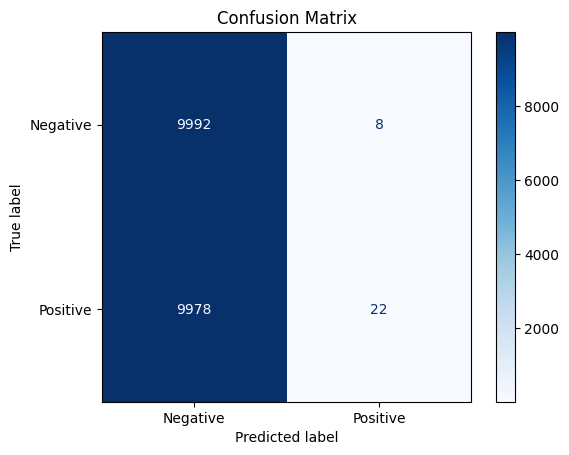

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred > 0.5)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred > 0.5)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[9992    8]
 [9978   22]]


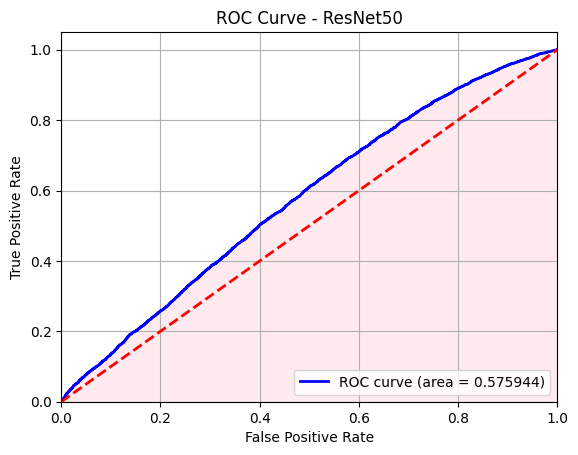

In [22]:

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='blue', lw=lw, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.fill_between(fpr, tpr, color='pink', alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ResNet50')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()